In [2]:
import numpy as np
import pylab as plt
import glob

In [4]:
# http://www.aoc.nrao.edu/~akimball/radiocat_1.1.shtml#download
files = glob.glob("/home/phil/hera/radiocat/*.csv")
files.sort()

In [24]:
# Get column names from header
with open(files[0], 'r') as f:
    columns = f.readline().lower().split(",")

# Load catalogues into memory
cat_list = []
for i, f in enumerate(files):
    print("Loading %d / %d" % (i+1, len(files)))
    _d = np.genfromtxt(f, delimiter=',', skip_header=1).T
    cat_list.append(_d)
cat = np.column_stack(cat_list)
cat.shape

Loading 1 / 72
Loading 2 / 72
Loading 3 / 72
Loading 4 / 72
Loading 5 / 72
Loading 6 / 72
Loading 7 / 72
Loading 8 / 72
Loading 9 / 72
Loading 10 / 72
Loading 11 / 72
Loading 12 / 72
Loading 13 / 72
Loading 14 / 72
Loading 15 / 72
Loading 16 / 72
Loading 17 / 72
Loading 18 / 72
Loading 19 / 72
Loading 20 / 72
Loading 21 / 72
Loading 22 / 72
Loading 23 / 72
Loading 24 / 72
Loading 25 / 72
Loading 26 / 72
Loading 27 / 72
Loading 28 / 72
Loading 29 / 72
Loading 30 / 72
Loading 31 / 72
Loading 32 / 72
Loading 33 / 72
Loading 34 / 72
Loading 35 / 72
Loading 36 / 72
Loading 37 / 72
Loading 38 / 72
Loading 39 / 72
Loading 40 / 72
Loading 41 / 72
Loading 42 / 72
Loading 43 / 72
Loading 44 / 72
Loading 45 / 72
Loading 46 / 72
Loading 47 / 72
Loading 48 / 72
Loading 49 / 72
Loading 50 / 72
Loading 51 / 72
Loading 52 / 72
Loading 53 / 72
Loading 54 / 72
Loading 55 / 72
Loading 56 / 72
Loading 57 / 72
Loading 58 / 72
Loading 59 / 72
Loading 60 / 72
Loading 61 / 72
Loading 62 / 72
Loading 63 / 72
L

(117, 2724343)

In [48]:
idxs = np.where(cat[columns.index('nvss_flux')] > 1000.)
print(idxs[0].size)

3693


/tmp/ipykernel_71948/680911235.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cat[columns.index('nvss_flux')]), bins=40, range=(0., 4.))


(array([0.00000e+00, 0.00000e+00, 3.70000e+01, 1.72528e+05, 3.26605e+05,
        2.87111e+05, 2.28169e+05, 1.83716e+05, 1.72074e+05, 1.57049e+05,
        1.39291e+05, 1.22871e+05, 1.08291e+05, 9.49500e+04, 7.98260e+04,
        6.84440e+04, 5.73050e+04, 4.73720e+04, 3.85220e+04, 3.12140e+04,
        2.49100e+04, 1.94260e+04, 1.55060e+04, 1.15600e+04, 8.56900e+03,
        6.09300e+03, 4.71600e+03, 3.22100e+03, 2.39100e+03, 1.71600e+03,
        1.17400e+03, 7.65000e+02, 5.28000e+02, 3.88000e+02, 3.11000e+02,
        1.74000e+02, 1.08000e+02, 8.40000e+01, 4.60000e+01, 3.10000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. ]),
 <BarContainer object of 40 artists>)

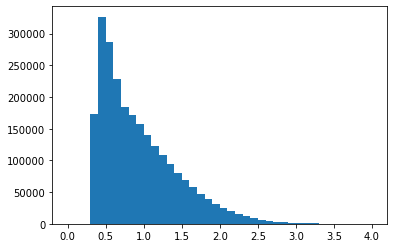

In [49]:
plt.hist(np.log10(cat[columns.index('nvss_flux')]), bins=40, range=(0., 4.))

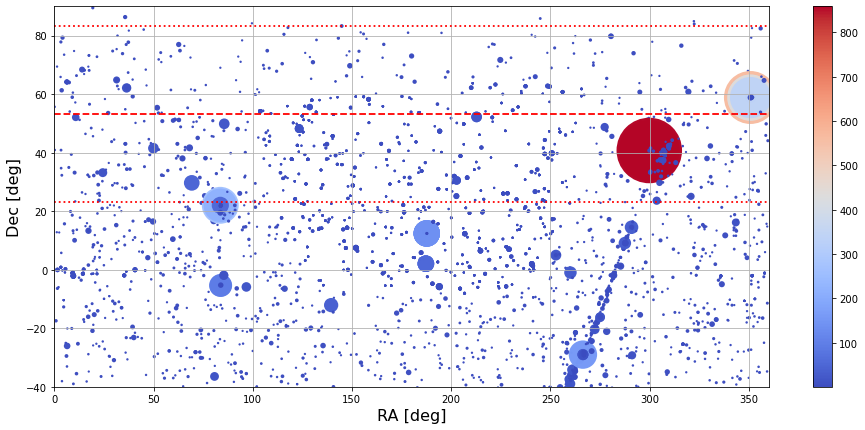

In [67]:
ax = plt.scatter(cat[columns.index('ra'),idxs], 
            cat[columns.index('dec'),idxs], 
            c=1e-3*cat[columns.index('nvss_flux'),idxs],
            s=5.*1e-3*cat[columns.index('nvss_flux'),idxs],
            alpha=0.99, cmap='coolwarm', linewidths=0.)

plt.grid()
plt.axhline(53.2421, color='r', lw=1.8, ls='dashed')
plt.axhline(53.2421+30., color='r', lw=1.8, ls='dotted')
plt.axhline(53.2421-30., color='r', lw=1.8, ls='dotted')
plt.xlabel("RA [deg]", fontsize=16)
plt.ylabel("Dec [deg]", fontsize=16)
plt.xlim(0., 360.)
plt.ylim(-40., 90.)
plt.colorbar(ax)
plt.gcf().set_size_inches((16., 7.))